## Problem Statement

#### Create a machine learning model which will help the company in determining the salary of newly hired emloyees using the given data

In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [129]:
# Reading the dataset

df = pd.read_csv('ML case Study.csv', header= 0)
df_copy = df.copy

# Reading first 5 rows
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,SVNIT Surat,Asansol,Manager,55523.0,3,66,19,71406.58
1,NIT Bhopal,Ajmer,Executive,57081.0,1,84,18,68005.87
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010.0,2,81,33,82092.39
4,DTU,Durgapur,Executive,57879.0,4,74,32,73878.10


In [130]:
# Reading last 5 rows
df.tail()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
1584,BITS Pilani (Goa Campus),Surat,Executive,61285.0,3,44,60,77283.59
1585,NIT Warangal,Rajpur Sonarpur,Executive,63140.0,1,44,24,68416.86
1586,NIT Tiruchipally (Trichy),Ahmedabad,Executive,44907.0,1,60,19,70186.19
1587,IIIT Hyderabad,Durgapur,Executive,52054.0,2,67,29,73394.09
1588,R.V. College of Engineering,Delhi,Manager,44353.0,3,75,18,70056.31


In [5]:
# Datatype detail
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   College              1589 non-null   object 
 1   City                 1589 non-null   object 
 2   Role                 1589 non-null   object 
 3   Previous CTC         1589 non-null   float64
 4   Previous job change  1589 non-null   int64  
 5   Graduation Marks     1589 non-null   int64  
 6   EXP (Month)          1589 non-null   int64  
 7   CTC                  1589 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 99.4+ KB


## Exploratory Data Analysis

In [131]:
print('Dataset has {} rows and {} columns'.format(df.shape[0], df.shape[1]))

Dataset has 1589 rows and 8 columns


In [132]:
# Missing values?

df.isnull().sum()

College                0
City                   0
Role                   0
Previous CTC           0
Previous job change    0
Graduation Marks       0
EXP (Month)            0
CTC                    0
dtype: int64

##### Insights
- Dataset has 1589 rows and 8 columns
- No missing values found
- Variables College, City, Role are categorical and rest are numeric

#### Analyzing and replacing College variable with respective tier

In [133]:
# df.College.unique()
df.College.nunique()

66

In [134]:
# Replacing college name with subsequent Tier for analysis purpose

df_college = pd.read_csv('Colleges.csv')
df_college.head()

,Tier 1,Tier 2,Tier 3
0,IIT Bombay,IIIT Bangalore,"Ramaiah Institute of Technology, Bengaluru"
1,IIT Delhi,IIIT Delhi,TIET/Thapar University
2,IIT Kharagpur,IGDTUW,Manipal Main Campus
3,IIT Madras,NIT Calicut,VIT Vellore
4,IIT Kanpur,IIITM Gwalior,SRM Main Campus


In [135]:
tier1 = df_college['Tier 1'].tolist()
tier2 = df_college['Tier 2'].tolist()
tier3 = df_college['Tier 3'].tolist()

In [136]:
df['college_tier'] = df.College
for item in df.College:
    if item in tier1:
        df['college_tier'].replace(item, 3, inplace= True)
    if item in tier2:
        df['college_tier'].replace(item, 2, inplace= True)
    if item in tier3:
        df['college_tier'].replace(item, 1, inplace= True)
        
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,college_tier
0,SVNIT Surat,Asansol,Manager,55523.0,3,66,19,71406.58,2
1,NIT Bhopal,Ajmer,Executive,57081.0,1,84,18,68005.87,2
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02,1
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010.0,2,81,33,82092.39,1
4,DTU,Durgapur,Executive,57879.0,4,74,32,73878.10,3


In [137]:
df.isnull().sum()

College                0
City                   0
Role                   0
Previous CTC           0
Previous job change    0
Graduation Marks       0
EXP (Month)            0
CTC                    0
college_tier           0
dtype: int64

In [138]:
df.City.value_counts().nunique()

14

In [139]:
# Replacing city as metro , non-metro

df_city = pd.read_csv('cities.csv', header = 0)
df_city.head()

,Metrio City,non-metro cities
0,Mumbai,Dehradun
1,Delhi,Durgapur
2,Kolkata,Asansol
3,Chennai,Rourkela
4,Bangalore,Kozhikode


In [140]:
metro = df_city['Metrio City'].tolist()
non_metro = df_city['non-metro cities'].tolist()

df['city1'] = df.City
for item in df.City:
    if item in metro:
        df['city1'].replace(item, 1, inplace= True)
    if item in non_metro:
        df['city1'].replace(item, 0, inplace= True)

df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,college_tier,city1
0,SVNIT Surat,Asansol,Manager,55523.0,3,66,19,71406.58,2,0
1,NIT Bhopal,Ajmer,Executive,57081.0,1,84,18,68005.87,2,0
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02,1,0
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010.0,2,81,33,82092.39,1,0
4,DTU,Durgapur,Executive,57879.0,4,74,32,73878.10,3,0


In [141]:
# df.loc[df.City == 'Rourkela']

df['City'] = df['city1']

df.drop(columns = ['College', 'city1'], inplace= True)
df.head()

,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,college_tier
0,0,Manager,55523.0,3,66,19,71406.58,2
1,0,Executive,57081.0,1,84,18,68005.87,2
2,0,Executive,60347.0,2,52,28,76764.02,1
3,0,Executive,49010.0,2,81,33,82092.39,1
4,0,Executive,57879.0,4,74,32,73878.10,3


In [142]:
df.Role.unique()

array(['Manager', 'Executive'], dtype=object)

In [143]:
# Renaming the column names for ease of access

df.rename(columns = {   'City' : 'city',
                        'Role': 'role',
                        'Previous CTC' : 'previous_ctc',
                        'Previous job change' : 'previous_job_change',
                        'Graduation Marks' : 'graduation_marks',
                        'EXP (Month)' : 'exp_month',
                        'CTC' : 'ctc'},
                 inplace = True)
df.columns

Index(['city', 'role', 'previous_ctc', 'previous_job_change',
       'graduation_marks', 'exp_month', 'ctc', 'college_tier'],
      dtype='object')

In [144]:
# Extended Data Dictionary

df.describe(include = 'all')

,city,role,previous_ctc,previous_job_change,graduation_marks,exp_month,ctc,college_tier
count,1589.000000,1589,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Executive,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1261,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.514160,NaN,55518.453744,2.528634,59.855255,39.044682,75353.278798,2.024544
std,0.499957,NaN,6655.218445,1.123918,14.935139,14.108875,12587.288237,0.838330
min,0.000000,NaN,36990.000000,1.000000,35.000000,18.000000,53020.320000,1.000000
25%,0.000000,NaN,50518.000000,2.000000,46.000000,26.000000,66902.350000,1.000000
50%,1.000000,NaN,55291.000000,3.000000,60.000000,39.000000,73028.670000,2.000000
75%,1.000000,NaN,60109.000000,4.000000,73.000000,51.000000,80588.670000,3.000000


##### Insights from Data preprocessing

- Categorical variable, College replaced with respective tier weightage
- Categorical variable, City updated as metro / non-metro
- Variables names updated for ease of access
- Extended data dictionary analyzed

### Univariate Analysis

#### Outlier Analysis

Univariate analysis focuses soley on describing and summarizing the distribution of the single variable.

In [145]:
# numerical variables
df_num = df.select_dtypes(include = ['int64', 'float64'])

# dropping the discrete numeric variables city, previous_job_change, college_tier
df_num.drop(columns= ['city', 'previous_job_change', 'college_tier'], inplace= True)

In [146]:
df_num.head()

,previous_ctc,graduation_marks,exp_month,ctc
0,55523.0,66,19,71406.58
1,57081.0,84,18,68005.87
2,60347.0,52,28,76764.02
3,49010.0,81,33,82092.39
4,57879.0,74,32,73878.10


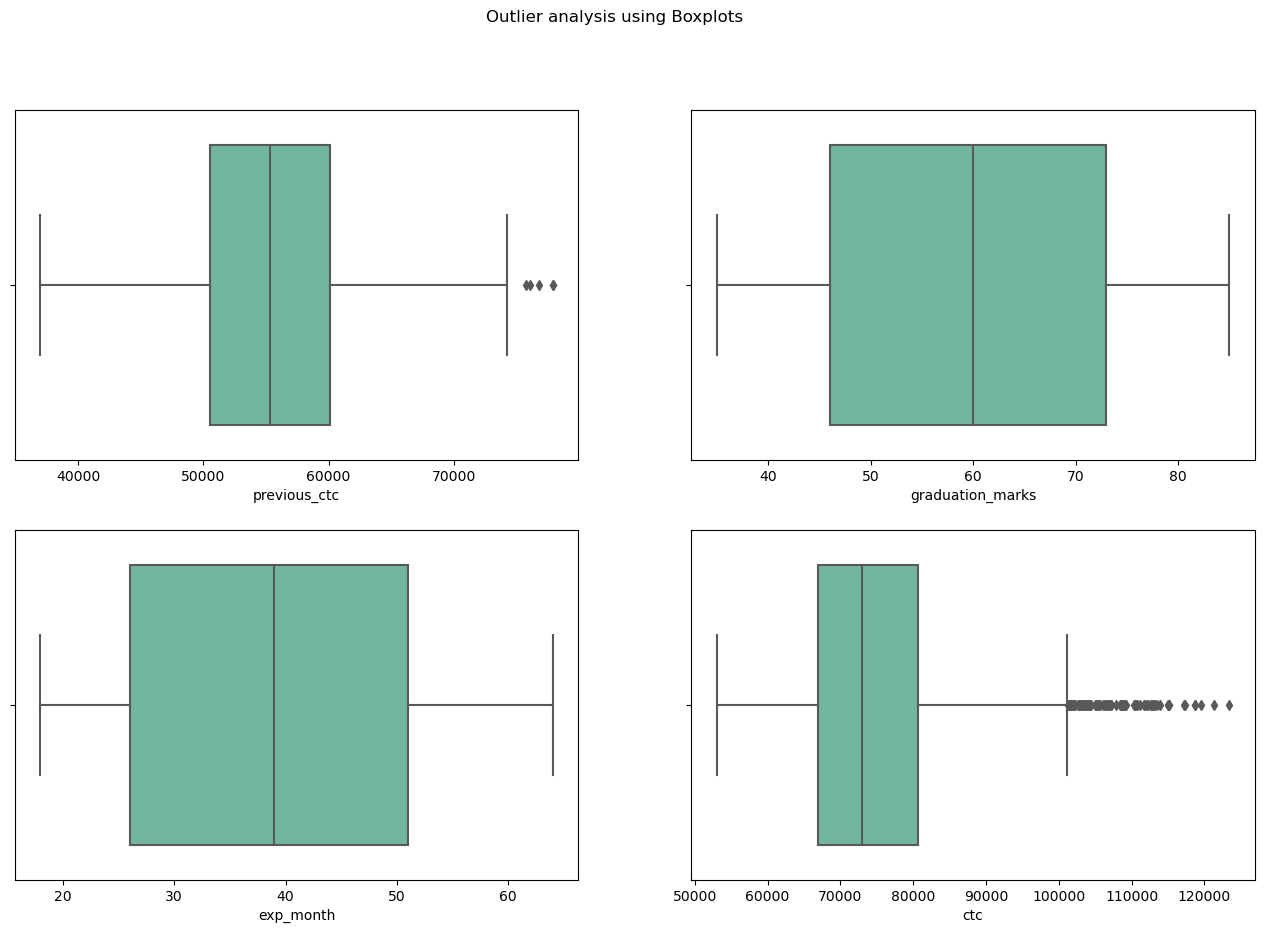

In [147]:
# Outlier analysis using boxplot
fig, ax = plt.subplots(2, 2, figsize = (16, 10))
ax = ax.flatten()

for i, c in enumerate(df_num):
    sns.boxplot(x = df_num[c], ax = ax[i], palette = 'Set2')
plt.suptitle('Outlier analysis using Boxplots', fontsize = 12)
plt.show()

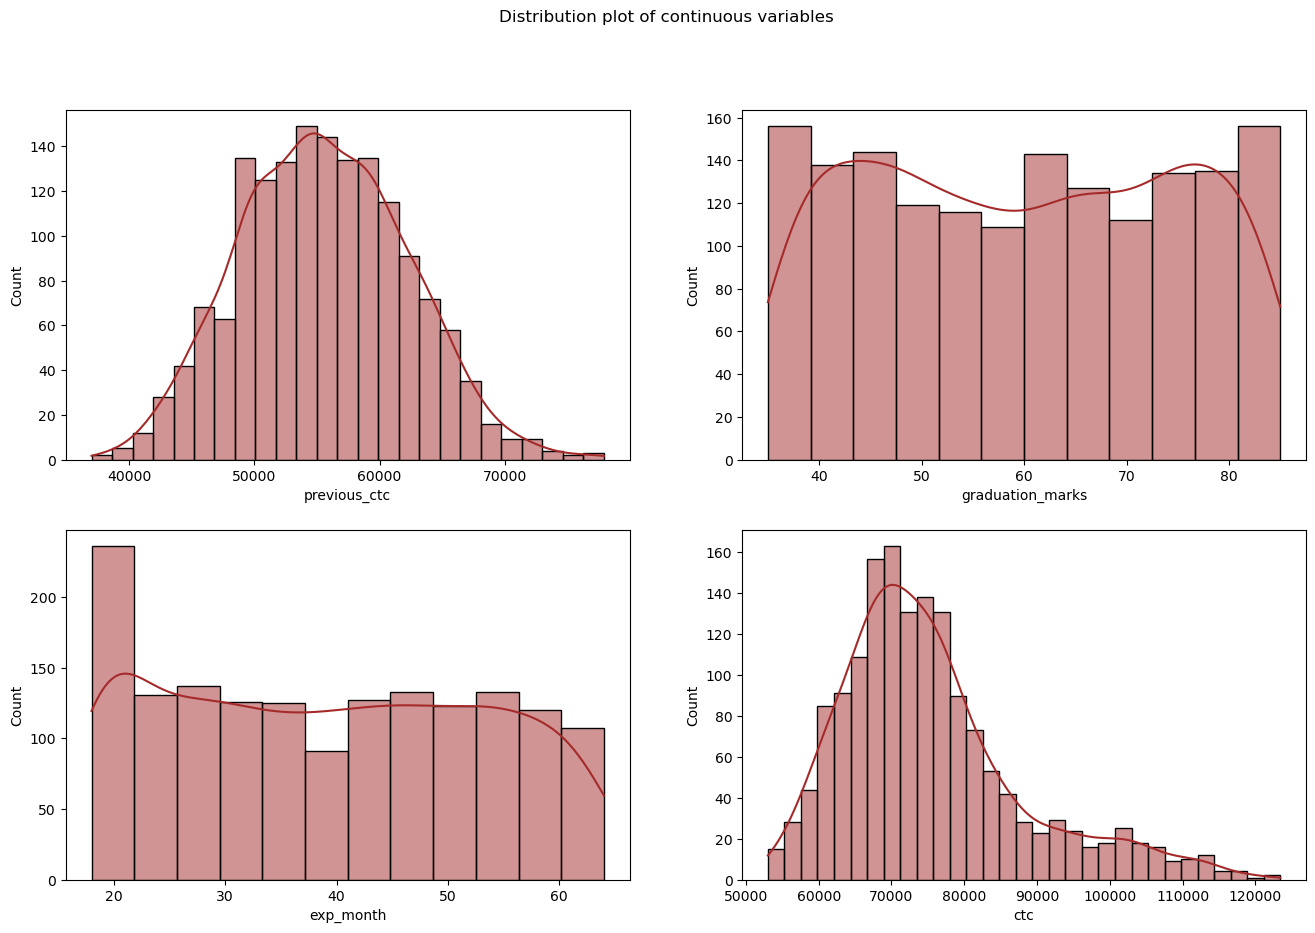

In [148]:
fig, ax = plt.subplots(2, 2, figsize = (16, 10))
ax = ax.flatten()

for i, c in enumerate(df_num):
    sns.histplot(x = df_num[c], ax= ax[i], kde= True, color= 'brown')
#     plt.title(c)
plt.suptitle('Distribution plot of continuous variables', fontsize = 12)
plt.show()

In [30]:
# Skewness of continuous variables
for x in df_num.columns:
    print('Skewness of {} : {}'.format(x, round(df_num[x].skew(), 3)))


Skewness of previous_ctc : 0.15
Skewness of graduation_marks : 0.012
Skewness of exp_month : 0.079
Skewness of ctc : 1.092


#### Insights

- Presence of outliers in variables previous_ctc and ctc
- Skewness examined and found that ctc is highly positively skewed. CTC is the dependent variable
- Approach to addressing outliers
- The problem with outliers in dependent variable is that it might be an influential value. A copy of dataframe kept for analysis.

In [31]:
# Outlier treatment

def remove_outlier(col):
    sorted(col)
    Q1,Q3 = np.percentile(col, [25, 75])
    IQR = Q3 - Q1
    lower_range = Q1 - 1.5*IQR
    upper_range = Q3 + 1.5*IQR
    return lower_range, upper_range

In [149]:
# Copy of dataframe with outliers
df_outliers = df.copy()

df_num.columns
# previous_cts, ctc

Index(['previous_ctc', 'graduation_marks', 'exp_month', 'ctc'], dtype='object')

In [35]:
lr, ur = remove_outlier(df.previous_ctc)
df.previous_ctc = np.where(df.previous_ctc > ur, ur, df.previous_ctc)
df.previous_ctc = np.where(df.previous_ctc < lr, lr, df.previous_ctc)

lr, ur = remove_outlier(df.ctc)
df.ctc = np.where(df.ctc > ur, ur, df.ctc)
df.ctc = np.where(df.ctc < lr, lr, df.ctc)

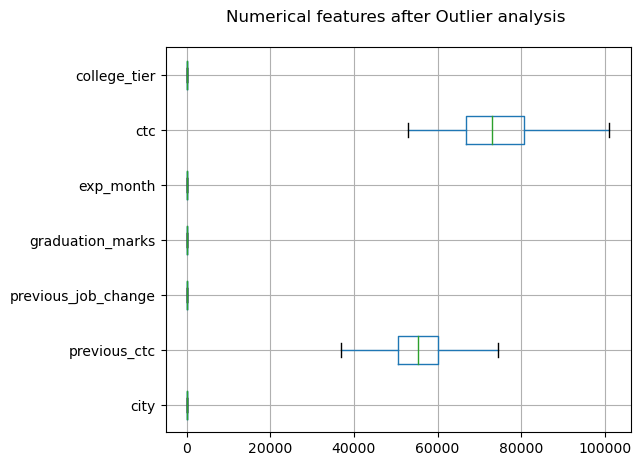

In [36]:
# Dataset after outlier treatment
plt.figure(figsize = (6, 5))
df.boxplot(vert = 0)
plt.title('Numerical features after Outlier analysis \n')
plt.show()

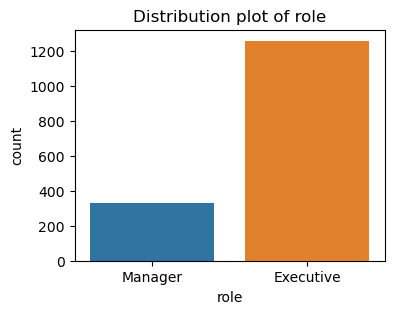

In [38]:
# Distribution plot of categorical variable, role
plt.figure(figsize = (4, 3))
sns.countplot(x= df.role)
plt.title('Distribution plot of role')
plt.show()

In [39]:
# Conversion of Categorical variable, role to dummy variables

print(df.role.value_counts())

df = pd.get_dummies(data= df, columns= ['role'], drop_first= True)
df.head()

Executive    1261
Manager       328
Name: role, dtype: int64


,city,previous_ctc,previous_job_change,graduation_marks,exp_month,ctc,college_tier,role_Manager
0,0,55523.0,3,66,19,71406.58,2,1
1,0,57081.0,1,84,18,68005.87,2,0
2,0,60347.0,2,52,28,76764.02,1,0
3,0,49010.0,2,81,33,82092.39,1,0
4,0,57879.0,4,74,32,73878.10,3,0


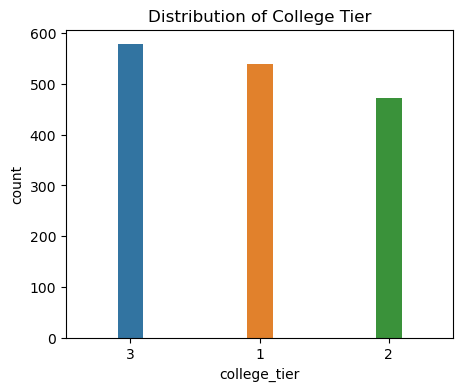

In [40]:
plt.figure(figsize = (5, 4))
sns.countplot(x= df.college_tier, width= 0.2, order= [3,1,2])
plt.title('Distribution of College Tier')
plt.show()

#### Insights from Univariate Analysis

- Outliers treated
- Distribution plot of role shows current dataset has higher number of Executives
- Role variable replaced with respective dummy variables
- Distribution plot of college tier variable shows higher number of candidates are from Tier 3 colleges
- All the 8 variables are of numerical datatype now

In [41]:
# Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   city                 1589 non-null   int64  
 1   previous_ctc         1589 non-null   float64
 2   previous_job_change  1589 non-null   int64  
 3   graduation_marks     1589 non-null   int64  
 4   exp_month            1589 non-null   int64  
 5   ctc                  1589 non-null   float64
 6   college_tier         1589 non-null   int64  
 7   role_Manager         1589 non-null   uint8  
dtypes: float64(2), int64(5), uint8(1)
memory usage: 88.6 KB


### Bivariate Analysis

Bivariate analysis refers to the analysis of two variables to determine relationships between them

<Figure size 400x400 with 0 Axes>

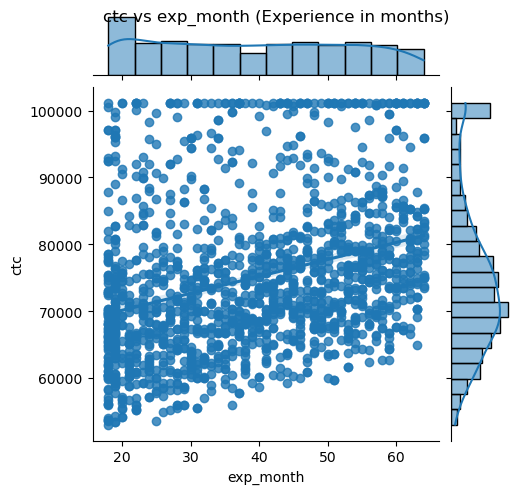

In [42]:
plt.figure(figsize = (4, 4))
sns.jointplot(x= df.exp_month, y= df.ctc, kind= 'reg', height= 5)
plt.suptitle('ctc vs exp_month (Experience in months)')
plt.show()

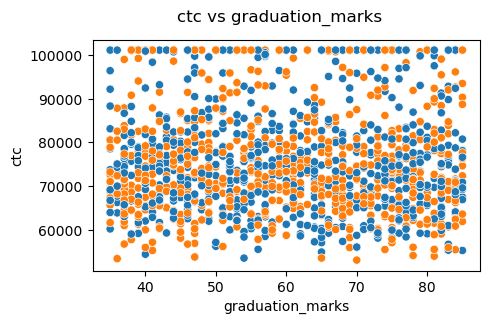

In [49]:
plt.figure(figsize = (5, 3))
sns.scatterplot(x= df.graduation_marks, y= df.ctc, hue= df.city, legend= False)
plt.suptitle('ctc vs graduation_marks')
plt.show()

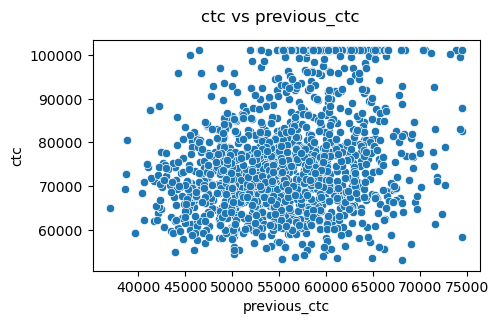

In [50]:
plt.figure(figsize = (5, 3))
sns.scatterplot(x= df.previous_ctc, y= df.ctc)
plt.suptitle('ctc vs previous_ctc')
plt.show()

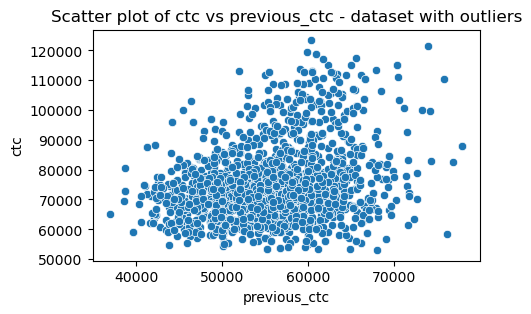

In [47]:
plt.figure(figsize= (5, 3))
sns.scatterplot(x= df_outliers.previous_ctc, y= df_outliers.ctc)
plt.title('Scatter plot of ctc vs previous_ctc - dataset with outliers')
plt.show()

#### Insights from Bivariate analysis

- Scatter plot between the independent variable, exp_month and dependent variable, ctc shows the presence of a linear relationship. More years of experience indicates increase in ctc.
- Observations are scattered in case of graduation marks and ctc. The spread of hueness shows the candidates from both metros and non-metros.
- Scatter plot between previous_ctc and ctc shows positive linear relationship

### Multivariate Analysis - Correlation

Multivariable analysis is used to find patterns and correlations between multiple factors by analyzing two or more variables at once. A Correlation matrix is a handy way to calculate the pairwise correlation coefficients between two or more numeric variables.

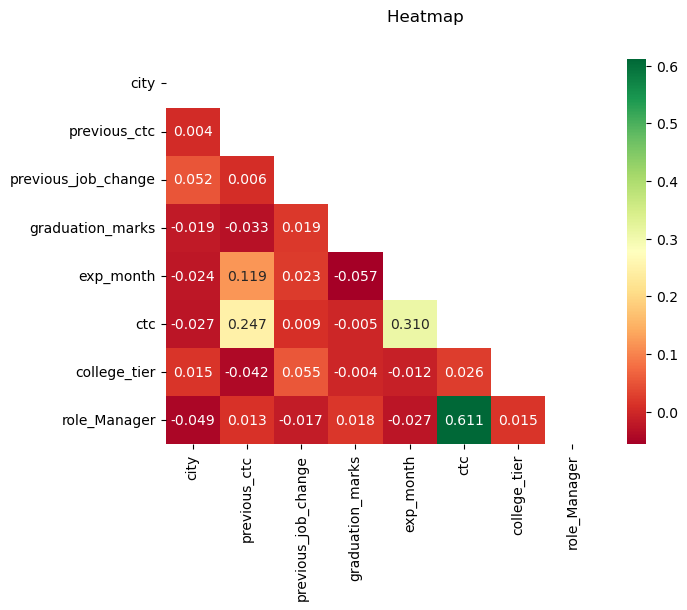

In [48]:
plt.figure(figsize=(7,5))
corr = df.corr()
mask = np.triu(np.ones_like(corr))
sns.heatmap(corr, annot=True, fmt='0.3f', cmap='RdYlGn', mask=mask);
plt.suptitle('Heatmap \n');

#### Insights from Multivariate analysis

- A positive correlation of 0.611 between role_Manager and ctc
- There is no presence of 'highly correlated' variables in the dataset
- Darker the color red shows stonger negative correlation between the variables

## Modeling

Dataset split into X with independent variables and y with dependent variable. This will help model to learn the relationship between independent and dependent variable. Further train test split is done. Train test split is a model validation process that allows you to simulate how your model would perform with new data. Here test_size is taken as 0.20 which means 80% of observations considered for training and 20% for testing.

In [51]:
# Splitting to X and y datasets
X = df.drop(columns= ['ctc'], axis= 1)
y = df.ctc

X.shape

(1589, 7)

In [52]:
# Train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state= 22)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1271, 7) (318, 7) (1271,) (318,)


### Multiple Linear Regression

In [53]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, r2_score

Addition of a constant to X dataframe is a structural requirement so that Ordinary Least Square estimation can be performed properly.

In [55]:
X_cons = sm.add_constant(X)
X_cons.head()

,const,city,previous_ctc,previous_job_change,graduation_marks,exp_month,college_tier,role_Manager
0,1.0,0,55523.0,3,66,19,2,1
1,1.0,0,57081.0,1,84,18,2,0
2,1.0,0,60347.0,2,52,28,1,0
3,1.0,0,49010.0,2,81,33,1,0
4,1.0,0,57879.0,4,74,32,3,0


In [56]:
sm_reg = sm.OLS(y, X_cons).fit()
sm_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ctc   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     246.6
Date:                Fri, 01 Mar 2024   Prob (F-statistic):          4.13e-248
Time:                        13:16:31   Log-Likelihood:                -16530.
No. Observations:                1589   AIC:                         3.308e+04
Df Residuals:                    1581   BIC:                         3.312e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4.036e+04   2067.031     19.526      0.000    3.63e+04    4.44e+04
city                  200.5367    402.493      0.498      0.618    -588.939     990.012
previous_ctc            0.3557      0.031     11.660      0.000       0.296       0.416
previous_job_change    97.2181    179.110      0.543      0.587    -254.101     448.537
graduation_marks        6.5173     13.466      0.484      0.628     -19.895      32.930
exp_month             248.1357     14.355     17.285      0.000     219.978     276.293
college_tier          390.8198    239.928      1.629      0.104     -79.791     861.431
role_Manager         1.757e+04    496.505     35.386      0.000    1.66e+04    1.85e+04
==============================================================================
Omnibus:                       26.345   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.336
Skew:                           0.304   Prob(JB):                     1.16e-06
Kurtosis:                       3.205   Cond. No.                     5.77e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.77e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Linear Regression of sklearn library. Sklearn is used when main task is prediction. When inference is required, statsmodels used

In [57]:

lm_reg = LinearRegression()
lm_reg.fit(X_train, y_train)

y_test_predict = lm_reg.predict(X_test)
y_train_predict = lm_reg.predict(X_train)

print('Train R2 score : {}'.format(r2_score(y_train, y_train_predict)))
print('Test R2 score : {}'.format(r2_score(y_test, y_test_predict)))
print('Test MSE : {}'.format(mean_squared_error(y_test, y_test_predict)))

lm_train_r2 = r2_score(y_train, y_train_predict)
lm_test_r2 = r2_score(y_test, y_test_predict)
lm_test_mse = mean_squared_error(y_test, y_test_predict)

Train R2 score : 0.5234671688006189
Test R2 score : 0.5074148668700487
Test MSE : 64086947.48272754


### Ridge Regression

Ridge Regression is a type of Linear Regression in which regularization term is added as a parameter. Scale of variables matters in Ridge. StandardScaler used to standardize predictor variables in this case.

In [59]:
from sklearn import preprocessing
from sklearn.linear_model import Ridge

from sklearn.model_selection import validation_curve

In [60]:
# Scaling the dataset

scaler = preprocessing.StandardScaler().fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

In [61]:
rd_reg= Ridge(alpha= 0.4, random_state= 22)
rd_reg.fit(X_train_s, y_train)

y_test_predict_s = rd_reg.predict(X_test_s)
y_train_predict_s = rd_reg.predict(X_train_s)

print('Train R2 score : {}'.format(r2_score(y_train, y_train_predict_s)))
print('Test R2 score : {}'.format(r2_score(y_test, y_test_predict_s)))
print('Test MSE : {}'.format(mean_squared_error(y_test, y_test_predict_s)))

rd_train_r2 = r2_score(y_train, y_train_predict_s)
rd_test_r2 = r2_score(y_test, y_test_predict_s)
rd_test_mse = mean_squared_error(y_test, y_test_predict_s)

Train R2 score : 0.5234671167688214
Test R2 score : 0.507419909492369
Test MSE : 64086291.420962594


In [62]:
# Optimum value of alpha using validation_curve

param_range = np.logspace(-2, 8, 100)

rd_reg = Ridge()
train_scores, test_scores = validation_curve(rd_reg, X_train_s, y_train, param_name = 'alpha', 
                                            param_range = param_range, scoring= 'r2')

train_mean = np.mean(train_scores, axis = 1)
test_mean = np.mean(test_scores, axis = 1)

In [63]:
# max(test_mean)
np.where(test_mean == max(test_mean))

(array([32], dtype=int64),)

In [64]:
max(test_mean)

0.5102184603880507

In [65]:
# lambda value
param_range[32]

17.073526474706906

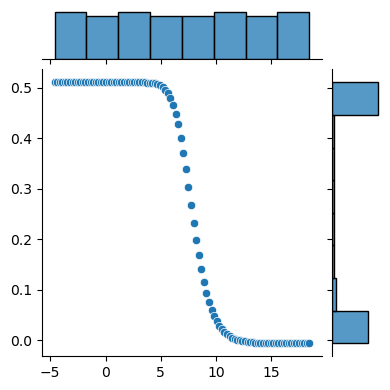

In [66]:
sns.jointplot(x= np.log(param_range), y= test_mean, height=4)
plt.show()

In [67]:
# Running the model with best lambda value

rd_best_reg = Ridge(alpha= param_range[32], random_state= 22)
rd_best_reg.fit(X_train_s, y_train)

y_test_predict_s = rd_best_reg.predict(X_test_s)
y_train_predict_s = rd_best_reg.predict(X_train_s)

print('Train R2 score : {}'.format(r2_score(y_train, y_train_predict_s)))
print('Test R2 score : {}'.format(r2_score(y_test, y_test_predict_s)))
print('Test MSE : {}'.format(mean_squared_error(y_test, y_test_predict_s)))

rd_best_train_r2 = r2_score(y_train, y_train_predict_s)
rd_best_test_r2 = r2_score(y_test, y_test_predict_s)
rd_best_test_mse = mean_squared_error(y_test, y_test_predict_s)

Train R2 score : 0.5233748392061168
Test R2 score : 0.5075337343546233
Test MSE : 64071482.43165516


### The Lasso

The Lasso stands for Least Absolute Shrinkage and Selection Operator. It shrinks the regression coefficients toward zero by penalizing the regression model with a penalty term called L1-norm.

In [68]:
from sklearn.linear_model import Lasso

In [69]:
la_reg = Lasso(alpha= 0.5, random_state= 22)
la_reg.fit(X_train_s, y_train)

y_test_predict_s = la_reg.predict(X_test_s)
y_train_predict_s = la_reg.predict(X_train_s)

print('Train R2 score : {}'.format(r2_score(y_train, y_train_predict_s)))
print('Test R2 score : {}'.format(r2_score(y_test, y_test_predict_s)))
print('Test MSE : {}'.format(mean_squared_error(y_test, y_test_predict_s)))

la_train_r2 = r2_score(y_train, y_train_predict_s)
la_test_r2 = r2_score(y_test, y_test_predict_s)
la_test_mse = mean_squared_error(y_test, y_test_predict_s)

Train R2 score : 0.5234671562710052
Test R2 score : 0.5074167056564347
Test MSE : 64086708.25056515


In [70]:
# validation_curve for best lambda value
param_range = np.logspace(-2, 8, 100)
train_scores, test_scores = validation_curve(Lasso(), X_train_s, y_train, param_name= 'alpha', param_range= param_range,
                                            scoring= 'r2')

train_mean= np.mean(train_scores, axis= 1)
test_mean= np.mean(test_scores, axis= 1)

test_mean.max()

0.5118636265058408

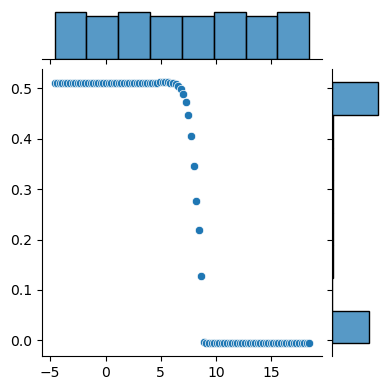

In [71]:
sns.jointplot(x= np.log(param_range), y= test_mean, height= 4)
plt.show()

In [72]:
np.where(test_mean == max(test_mean))

(array([44], dtype=int64),)

In [73]:
la_best_reg = Lasso(alpha= param_range[44], random_state= 22)
la_best_reg.fit(X_train_s, y_train)

y_test_predict_s = la_best_reg.predict(X_test_s)
y_train_predict_s = la_best_reg.predict(X_train_s)

print('Train R2 score : {}'.format(r2_score(y_train, y_train_predict_s)))
print('Test R2 score : {}'.format(r2_score(y_test, y_test_predict_s)))
print('Test MSE : {}'.format(mean_squared_error(y_test, y_test_predict_s)))

la_best_train_r2 = r2_score(y_train, y_train_predict_s)
la_best_test_r2 = r2_score(y_test, y_test_predict_s)
la_best_test_mse = mean_squared_error(y_test, y_test_predict_s)

Train R2 score : 0.520641963050938
Test R2 score : 0.5077760331061691
Test MSE : 64039958.56639603


### Decision Tree Regressor

In [74]:
from sklearn import tree
from sklearn.model_selection import GridSearchCV

In [75]:
dtr_reg = tree.DecisionTreeRegressor(max_depth= 3, random_state= 22)
dtr_reg.fit(X_train, y_train)

y_test_predict = dtr_reg.predict(X_test)
y_train_predict = dtr_reg.predict(X_train)

print('Train R2 score : {}'.format(r2_score(y_train, y_train_predict)))
print('Test R2 score : {}'.format(r2_score(y_test, y_test_predict)))
print('Test MSE : {}'.format(mean_squared_error(y_test, y_test_predict)))

dtr_train_r2 = r2_score(y_train, y_train_predict)
dtr_test_r2 = r2_score(y_test, y_test_predict)
dtr_test_mse = mean_squared_error(y_test, y_test_predict)

Train R2 score : 0.5922431315581679
Test R2 score : 0.5399002113899578
Test MSE : 59860497.21416758


In [76]:
# Parameter details
dtr_reg.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 22,
 'splitter': 'best'}

##### Hyper parameter tuning using GridSearchCV method
   This systematically explores a predefied set of hyperparameter values, creating a 'grid' of possible combinations. It then evaluates each combination using cross-validation and selects the one that produces best performance. GridSearchCV helps in automating the process of hyperparameter tuning, enhancing model performance, and avoiding manual trial and error.

In [77]:
# Model tuning using GridSearchCV

param_grid = {
                'max_depth' : [3, 4, 2],
                'min_samples_leaf' : [30, 35, 36, 37, 40],
                'min_samples_split' : [50, 55, 58, 60]
            }

dtr_best_reg = GridSearchCV(estimator= tree.DecisionTreeRegressor(random_state= 22), param_grid= param_grid, n_jobs= -1,
                           cv= 3)
dtr_best_reg.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=22), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 2],
                         'min_samples_leaf': [30, 35, 36, 37, 40],
                         'min_samples_split': [50, 55, 58, 60]})

In [78]:
dtr_best_reg.best_params_

{'max_depth': 3, 'min_samples_leaf': 37, 'min_samples_split': 50}

In [79]:
# Model fitted with Best parameter
dtr_best_reg= tree.DecisionTreeRegressor(max_depth= 3, min_samples_leaf= 37, min_samples_split= 50, random_state= 22)
dtr_best_reg.fit(X_train, y_train)

y_test_predict = dtr_best_reg.predict(X_test)
y_train_predict = dtr_best_reg.predict(X_train)

print('Train R2 score : {}'.format(r2_score(y_train, y_train_predict)))
print('Test R2 score : {}'.format(r2_score(y_test, y_test_predict)))
print('Test MSE : {}'.format(mean_squared_error(y_test, y_test_predict)))

dtr_best_train_r2 = r2_score(y_train, y_train_predict)
dtr_best_test_r2 = r2_score(y_test, y_test_predict)
dtr_best_test_mse = mean_squared_error(y_test, y_test_predict)

Train R2 score : 0.5917624327304465
Test R2 score : 0.5411509343584835
Test MSE : 59697774.03839888


In [80]:
# Plotting a decision tree
from IPython.display import Image
import pydotplus

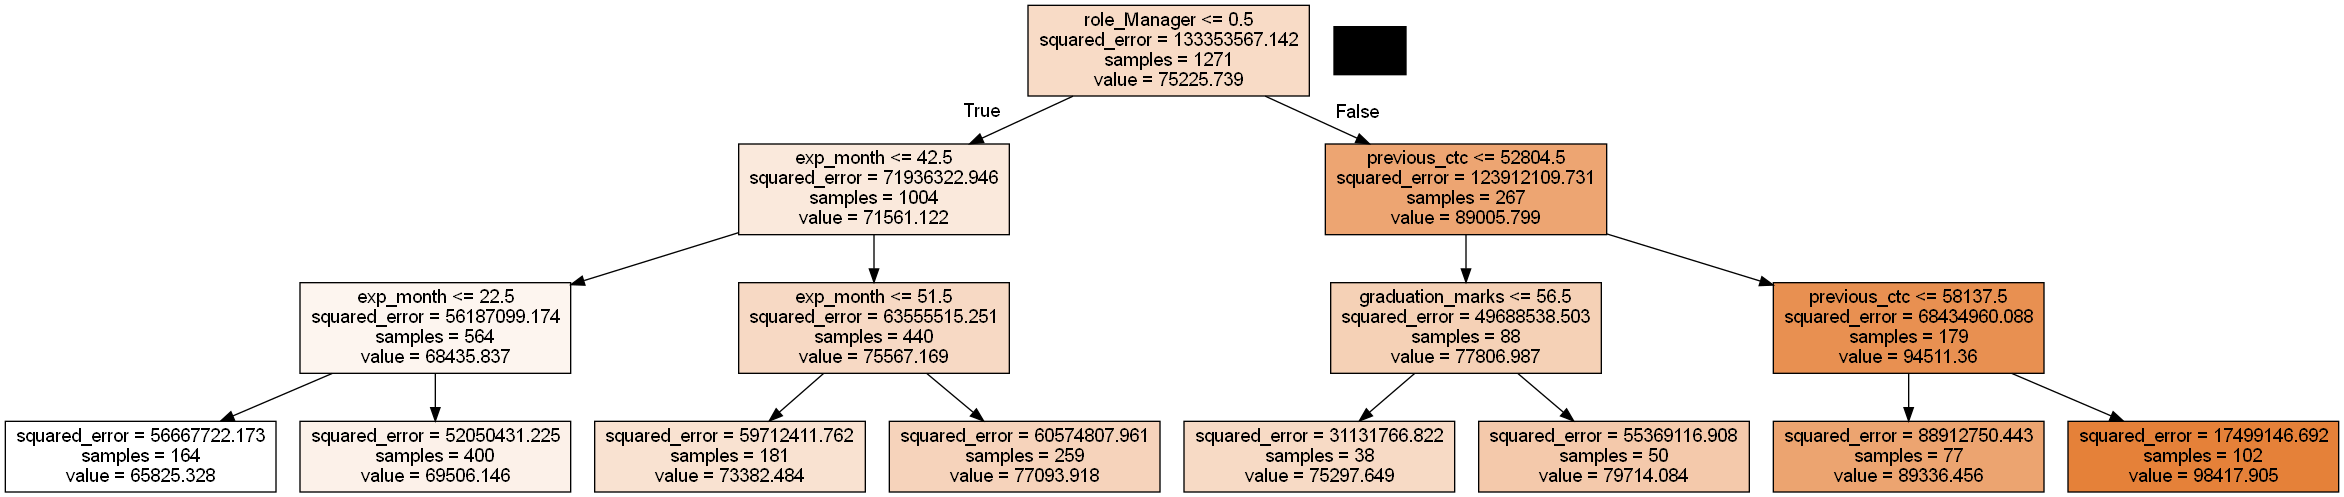

In [81]:
# dtr_best_reg= tree.DecisionTreeRegressor(max_depth= 3, min_samples_leaf= 35, min_samples_split= 60, random_state= 22)
# dtr_best_reg.fit(X_train, y_train)
dot_data = tree.export_graphviz(dtr_best_reg, out_file= None, feature_names= X_train.columns, filled= True)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

### Random Forest Regressor

Decision Tree was based on a single tree structure. Random Forest combines the output of multiple decision trees to reach a single result.

In [82]:
from sklearn.ensemble import RandomForestRegressor

In [83]:
rfr_reg = RandomForestRegressor(n_estimators= 800, n_jobs= -1, random_state= 22)
rfr_reg.fit(X_train, y_train)

y_test_predict = rfr_reg.predict(X_test)
y_train_predict = rfr_reg.predict(X_train)

print('Train R2 score : {}'.format(r2_score(y_train, y_train_predict)))
print('Test R2 score : {}'.format(r2_score(y_test, y_test_predict)))
print('Test MSE : {}'.format(mean_squared_error(y_test, y_test_predict)))

rfr_train_r2 = r2_score(y_train, y_train_predict)
rfr_test_r2 = r2_score(y_test, y_test_predict)
rfr_test_mse = mean_squared_error(y_test, y_test_predict)

Train R2 score : 0.9493037530603935
Test R2 score : 0.5641251567683075
Test MSE : 56708752.06837027


The Random forest base model appears to be overfitting, as evidenced by a Train score of 94.93% and a Test score of 56.41%. Hyperparameter tuning was conducted using the GridSearchCV method

In [85]:
rfr_reg.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 800,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 22,
 'verbose': 0,
 'warm_start': False}

In [91]:
param_grid = {
                'max_depth' : [4,5,6,7],
                'n_estimators' : [1000,1500],
#                 'min_samples_leaf' : [25,26,28,30,60],
                'min_samples_leaf' : range(40, 50, 1),
#                 'min_samples_split': [80,95,100,120,]
                'min_samples_split' : [79, 80, 82, 85]
}

grid_search = GridSearchCV(estimator= RandomForestRegressor(random_state= 22), param_grid= param_grid, n_jobs= -1, cv= 3)
grid_search.fit(X_train, y_train)

grid_search.best_params_

{'max_depth': 6,
 'min_samples_leaf': 40,
 'min_samples_split': 79,
 'n_estimators': 1000}

In [92]:
# rfr_best_reg = RandomForestRegressor(n_estimators= 1000,max_depth= 7, min_samples_leaf= 30, min_samples_split= 100, 
#                                      random_state= 22)

# rfr_best_reg = RandomForestRegressor(n_estimators= 1000,max_depth= 6, min_samples_leaf= 40, min_samples_split= 80, 
#                                      random_state= 22)

rfr_best_reg = RandomForestRegressor(n_estimators= 1000,max_depth= 6, min_samples_leaf= 40, min_samples_split= 79, 
                                     random_state= 22)
rfr_best_reg.fit(X_train, y_train)

y_test_predict = rfr_best_reg.predict(X_test)
y_train_predict = rfr_best_reg.predict(X_train)

print('Train R2 score : {}'.format(r2_score(y_train, y_train_predict)))
print('Test R2 score : {}'.format(r2_score(y_test, y_test_predict)))
print('Test MSE : {}'.format(mean_squared_error(y_test, y_test_predict)))

rfr_best_train_r2 = r2_score(y_train, y_train_predict)
rfr_best_test_r2 = r2_score(y_test, y_test_predict)
rfr_best_test_mse = mean_squared_error(y_test, y_test_predict)

Train R2 score : 0.6140867956607778
Test R2 score : 0.563349446610308
Test MSE : 56809674.51367766


In [93]:
pd.DataFrame(rfr_best_reg.feature_importances_, index= X_train.columns, columns= ['Feature Importance']).sort_values(ascending= False, by= ['Feature Importance'])

,Feature Importance
role_Manager,0.614047
previous_ctc,0.210187
exp_month,0.160792
graduation_marks,0.007374
previous_job_change,0.004243
college_tier,0.001926
city,0.001432


Feature importance provides an overall indication of the significance of each particular feature in the dataset.

### XGBoost

XGBoost, which stands for Extreme Gradient Boosting, is a scalable, distributed gradient-boosted decision tree (GBDT) machine learning library. It follows parallel tree boosting.

In [95]:
import xgboost as xgb

In [96]:
xgb_reg = xgb.XGBRegressor(max_depth= 3, n_jobs= -1)
xgb_reg.fit(X_train, y_train)

y_test_predict = xgb_reg.predict(X_test)
y_train_predict = xgb_reg.predict(X_train)

print('Train R2 score : {}'.format(r2_score(y_train, y_train_predict)))
print('Test R2 score : {}'.format(r2_score(y_test, y_test_predict)))
print('Test MSE : {}'.format(mean_squared_error(y_test, y_test_predict)))

xgb_train_r2 = r2_score(y_train, y_train_predict)
xgb_test_r2 = r2_score(y_test, y_test_predict)
xgb_test_mse = mean_squared_error(y_test, y_test_predict)

Train R2 score : 0.7943809780898439
Test R2 score : 0.5531751433194301
Test MSE : 58133384.86711986


XGBoost seem to be overfitting. Hyperparameter tuning with GridSearchCV adopted.

In [97]:
# Hyperparameter tuning

param_grid ={
            'max_depth' : range(3,10,2),
            'n_estimators' : [100,200,1000],
            'learning_rate': [0.1,0.01],
#             'min_child_weight':[6,7,8,9],
            'subsample' : [0.8,0.9],
            'reg_alpha' : [1e-2, 0.1, 1]
            }

grid_search = GridSearchCV(estimator= xgb.XGBRegressor(n_jobs= -1, random_state= 22), 
                               param_grid= param_grid, cv= 3 )
grid_search.fit(X_train, y_train)

grid_search.best_params_

{'learning_rate': 0.01,
 'max_depth': 7,
 'n_estimators': 1000,
 'reg_alpha': 0.01,
 'subsample': 0.9}

In [98]:
# xgb_best_reg = xgb.XGBRegressor(max_depth= 6, min_child_weight= 6, n_estimators= 100, learning_rate= 0.1, n_jobs= -1)
xgb_best_reg = xgb.XGBRegressor(max_depth= 7, subsample= 0.9, n_estimators= 1000, learning_rate= 0.01, reg_alpha= 0.01,
                                n_jobs= -1)
xgb_best_reg.fit(X_train, y_train)

y_test_predict = xgb_best_reg.predict(X_test)
y_train_predict = xgb_best_reg.predict(X_train)

print('Train R2 score : {}'.format(r2_score(y_train, y_train_predict)))
print('Test R2 score : {}'.format(r2_score(y_test, y_test_predict)))
print('Test MSE : {}'.format(mean_squared_error(y_test, y_test_predict)))

xgb_best_train_r2 = r2_score(y_train, y_train_predict)
xgb_best_test_r2 = r2_score(y_test, y_test_predict)
xgb_best_test_mse = mean_squared_error(y_test, y_test_predict)

Train R2 score : 0.941006104400409
Test R2 score : 0.5693440886868428
Test MSE : 56029751.84427932


XGBoost is overfitting with a Train score of 94.1% and Test score of 56.9%

### AdaBoost Regressor

AdaBoost regressor is a meta-estimator that begins by fitting a regressor on the original dataset and then fits additional copies of regressor on the same dataset but where the weights of instances are adjusted according to the error of the current prediction. I have used Random Forest Regressor with hyper tuned parameters to check whether this gives a better performance.

In [100]:
from sklearn.ensemble import AdaBoostRegressor

In [101]:
adb_reg = AdaBoostRegressor(base_estimator= rfr_best_reg, learning_rate= 0.023, n_estimators= 2000)
adb_reg.fit(X_train, y_train)

y_test_predict = adb_reg.predict(X_test)
y_train_predict = adb_reg.predict(X_train)

print('Train R2 score : {}'.format(r2_score(y_train, y_train_predict)))
print('Test R2 score : {}'.format(r2_score(y_test, y_test_predict)))
print('Test MSE : {}'.format(mean_squared_error(y_test, y_test_predict)))

adb_train_r2 = r2_score(y_train, y_train_predict)
adb_test_r2 = r2_score(y_test, y_test_predict)
adb_test_mse = mean_squared_error(y_test, y_test_predict)

Train R2 score : 0.6249450786637489
Test R2 score : 0.5524141465450136
Test MSE : 58232393.05278447


In [102]:
# Feature importance
pd.DataFrame(adb_reg.feature_importances_, index= X_train.columns, columns= ['Feature Importance']).sort_values(ascending= False, by= ['Feature Importance'])

,Feature Importance
role_Manager,0.494725
exp_month,0.215441
previous_ctc,0.209944
graduation_marks,0.049917
previous_job_change,0.013919
college_tier,0.008614
city,0.007440


In [104]:
index = ['Train R2', 'Test R2', 'Test MSE']

data = pd.DataFrame(
    {
    'Linear Regression' : ['{:.3f}'.format(lm_train_r2),'{:.3f}'.format(lm_test_r2),'{:.2f}'.format(lm_test_mse)],
    'Ridge' : ['{:.3f}'.format(rd_best_train_r2),'{:.3f}'.format(rd_best_test_r2),'{:.2f}'.format(rd_best_test_mse)],
    'Lasso' : ['{:.3f}'.format(la_best_train_r2),'{:.3f}'.format(la_best_test_r2),'{:.2f}'.format(la_best_test_mse)],
    'Decision Tree': ['{:.3f}'.format(dtr_best_train_r2),'{:.3f}'.format(dtr_best_test_r2),'{:.2f}'.format(dtr_best_test_mse)],
    'Random Forest': ['{:.3f}'.format(rfr_best_train_r2),'{:.3f}'.format(rfr_best_test_r2),'{:.2f}'.format(rfr_best_test_mse)],
    'XG Boost': ['{:.3f}'.format(xgb_best_train_r2),'{:.3f}'.format(xgb_best_test_r2),'{:.2f}'.format(xgb_best_test_mse)],
    'Ada Boost':['{:.3f}'.format(adb_train_r2),'{:.3f}'.format(adb_test_r2),'{:.2f}'.format(adb_test_mse)]
    },
        index= index
)

data

,Linear Regression,Ridge,Lasso,Decision Tree,Random Forest,XG Boost,Ada Boost
Train R2,0.523,0.523,0.521,0.592,0.614,0.941,0.625
Test R2,0.507,0.508,0.508,0.541,0.563,0.569,0.552
Test MSE,64086947.48,64071482.43,64039958.57,59697774.04,56809674.51,56029751.84,58232393.05


## Modelling with dataset with outliers

Some outliers represent natural variations in the population and should be left as they are. In this case, certain features may result in an exceptional CTS/previous CTC for an employee.

In [151]:
# lr, ur = remove_outlier(df.previous_ctc)
# df.previous_ctc = np.where(df.previous_ctc > ur, ur, df.previous_ctc)
# df.previous_ctc = np.where(df.previous_ctc < lr, lr, df.previous_ctc)

df_outliers_b = df_outliers.copy()
df_outliers_b.head()

,city,role,previous_ctc,previous_job_change,graduation_marks,exp_month,ctc,college_tier
0,0,Manager,55523.0,3,66,19,71406.58,2
1,0,Executive,57081.0,1,84,18,68005.87,2
2,0,Executive,60347.0,2,52,28,76764.02,1
3,0,Executive,49010.0,2,81,33,82092.39,1
4,0,Executive,57879.0,4,74,32,73878.10,3


In [152]:
lr, ur = remove_outlier(df_outliers.previous_ctc)

df_outliers[df_outliers.previous_ctc > ur]

,city,role,previous_ctc,previous_job_change,graduation_marks,exp_month,ctc,college_tier
116,1,Executive,77911.0,1,50,58,87831.62,1
860,1,Manager,75785.0,4,63,37,110338.25,3
1088,1,Executive,76815.0,4,75,52,82684.17,1
1317,0,Executive,76070.0,2,54,18,58309.56,3
1454,1,Executive,77911.0,1,50,58,87831.62,3


In [153]:
df_outliers[df_outliers.previous_ctc < lr]

,city,role,previous_ctc,previous_job_change,graduation_marks,exp_month,ctc,college_tier


In [154]:
lr, ur = remove_outlier(df_outliers.ctc)

df_outliers[df_outliers.ctc > ur]

,city,role,previous_ctc,previous_job_change,graduation_marks,exp_month,ctc,college_tier
14,0,Manager,66487.0,1,50,27,103595.83,1
29,0,Manager,65172.0,1,44,31,107138.14,2
30,0,Manager,58529.0,1,65,22,102763.61,3
34,0,Manager,60894.0,4,80,28,118651.89,3
38,0,Manager,57485.0,1,77,35,103774.34,2
...,...,...,...,...,...,...,...,...
1447,0,Manager,59099.0,2,67,63,103305.30,1
1461,0,Manager,55440.0,4,72,44,112826.26,3
1513,0,Manager,58639.0,2,46,63,109108.12,1
1523,1,Manager,70258.0,4,38,36,115126.75,2


In [155]:
df_outliers[df_outliers.ctc < lr]

,city,role,previous_ctc,previous_job_change,graduation_marks,exp_month,ctc,college_tier


#### Insights from outlier analysis

- previous_ctc has a total of 5 rows with value above 1.5 * IQR
- ctc has a total of 94 rows with value above 1.5 * IQR

In [156]:
df_outliers= pd.get_dummies(data= df_outliers, columns= ['role'], drop_first= True)

df_outliers.head()

,city,previous_ctc,previous_job_change,graduation_marks,exp_month,ctc,college_tier,role_Manager
0,0,55523.0,3,66,19,71406.58,2,1
1,0,57081.0,1,84,18,68005.87,2,0
2,0,60347.0,2,52,28,76764.02,1,0
3,0,49010.0,2,81,33,82092.39,1,0
4,0,57879.0,4,74,32,73878.10,3,0


In [157]:
X_wout = df_outliers.drop(columns= ['ctc'], axis= 1)
y_wout = df_outliers.ctc

X_wout.shape

(1589, 7)

In [158]:
X_train_wout, X_test_wout, y_train_wout, y_test_wout = train_test_split(X_wout, y_wout, test_size= 0.20, random_state= 22)

print(X_train_wout.shape, X_test_wout.shape, y_train_wout.shape, y_test_wout.shape)

(1271, 7) (318, 7) (1271,) (318,)


### Linear Regression

In [159]:
X_cons_wout = sm.add_constant(X_wout)

# sm_reg = sm.OLS(y, X_cons).fit()
sm_reg_wout = sm.OLS(y_wout, X_cons_wout).fit()
sm_reg_wout.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ctc   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     259.1
Date:                Fri, 01 Mar 2024   Prob (F-statistic):          4.70e-257
Time:                        22:17:27   Log-Likelihood:                -16648.
No. Observations:                1589   AIC:                         3.331e+04
Df Residuals:                    1581   BIC:                         3.335e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 3.65e+04   2221.039     16.432      0.000    3.21e+04    4.09e+04
city                  380.8308    433.455      0.879      0.380    -469.377    1231.039
previous_ctc            0.4101      0.033     12.526      0.000       0.346       0.474
previous_job_change   126.5653    192.887      0.656      0.512    -251.776     504.906
graduation_marks        6.2362     14.502      0.430      0.667     -22.208      34.681
exp_month             261.3444     15.460     16.904      0.000     231.020     291.669
college_tier          481.5147    258.382      1.864      0.063     -25.292     988.321
role_Manager         1.949e+04    534.694     36.446      0.000    1.84e+04    2.05e+04
==============================================================================
Omnibus:                       49.726   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.299
Skew:                           0.408   Prob(JB):                     9.82e-13
Kurtosis:                       3.411   Cond. No.                     5.76e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.76e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [161]:
lm_reg = LinearRegression()
lm_reg.fit(X_train_wout, y_train_wout)

y_test_predict_wout = lm_reg.predict(X_test_wout)
y_train_predict_wout = lm_reg.predict(X_train_wout)

print('Train R2 score : {}'.format(r2_score(y_train_wout, y_train_predict_wout)))
print('Test R2 score : {}'.format(r2_score(y_test_wout, y_test_predict_wout)))
print('Test MSE : {}'.format(mean_squared_error(y_test_wout, y_test_predict_wout)))

lm_train_r2_wout = r2_score(y_train_wout, y_train_predict_wout)
lm_test_r2_wout = r2_score(y_test_wout, y_test_predict_wout)
lm_test_mse_wout = mean_squared_error(y_test_wout, y_test_predict_wout)

Train R2 score : 0.536673283387934
Test R2 score : 0.5161546339244218
Test MSE : 73620819.19801834


### Decision Tree Regressor

In [162]:
dtr_reg = tree.DecisionTreeRegressor(max_depth= 3, random_state= 22)
dtr_reg.fit(X_train_wout, y_train_wout)

y_test_predict_wout = dtr_reg.predict(X_test_wout)
y_train_predict_wout = dtr_reg.predict(X_train_wout)

print('Train R2 score : {}'.format(r2_score(y_train_wout, y_train_predict_wout)))
print('Test R2 score : {}'.format(r2_score(y_test_wout, y_test_predict_wout)))
print('Test MSE : {}'.format(mean_squared_error(y_test_wout, y_test_predict_wout)))

dtr_train_r2_wout = r2_score(y_train_wout, y_train_predict_wout)
dtr_test_r2_wout = r2_score(y_test_wout, y_test_predict_wout)
dtr_test_mse_wout = mean_squared_error(y_test_wout, y_test_predict_wout)

Train R2 score : 0.6212988999418398
Test R2 score : 0.5655824523876336
Test MSE : 66099993.86502514


In [163]:
# Model tuning with GridSearchCV

param_grid = {
                'max_depth' : [3, 4, 2],
                'min_samples_leaf' : [30, 35, 36, 37, 40],
                'min_samples_split' : [50, 55, 58, 60]
            }

dtr_best_reg_wout = GridSearchCV(estimator= tree.DecisionTreeRegressor(random_state= 22), param_grid= param_grid, n_jobs= -1,
                           cv= 3)
dtr_best_reg_wout.fit(X_train_wout, y_train_wout)

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=22), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 2],
                         'min_samples_leaf': [30, 35, 36, 37, 40],
                         'min_samples_split': [50, 55, 58, 60]})

In [164]:
dtr_best_reg_wout.best_params_

{'max_depth': 3, 'min_samples_leaf': 30, 'min_samples_split': 50}

In [165]:
# Best parameter
dtr_best_reg_wout= tree.DecisionTreeRegressor(max_depth= 3, min_samples_leaf= 30, min_samples_split= 50, random_state= 22)
dtr_best_reg_wout.fit(X_train_wout, y_train_wout)

y_test_predict_wout = dtr_best_reg_wout.predict(X_test_wout)
y_train_predict_wout = dtr_best_reg_wout.predict(X_train_wout)

print('Train R2 score : {}'.format(r2_score(y_train_wout, y_train_predict_wout)))
print('Test R2 score : {}'.format(r2_score(y_test_wout, y_test_predict_wout)))
print('Test MSE : {}'.format(mean_squared_error(y_test_wout, y_test_predict_wout)))

dtr_best_train_r2_wout = r2_score(y_train_wout, y_train_predict_wout)
dtr_best_test_r2_wout = r2_score(y_test_wout, y_test_predict_wout)
dtr_best_test_mse_wout = mean_squared_error(y_test_wout, y_test_predict_wout)

Train R2 score : 0.6212436951248654
Test R2 score : 0.5659932333081477
Test MSE : 66037490.367007874


### Random Forest Regressor

In [166]:
rfr_reg = RandomForestRegressor(n_estimators= 800, n_jobs= -1, random_state= 22)
rfr_reg.fit(X_train_wout, y_train_wout)

y_test_predict_wout = rfr_reg.predict(X_test_wout)
y_train_predict_wout = rfr_reg.predict(X_train_wout)

print('Train R2 score : {}'.format(r2_score(y_train_wout, y_train_predict_wout)))
print('Test R2 score : {}'.format(r2_score(y_test_wout, y_test_predict_wout)))
print('Test MSE : {}'.format(mean_squared_error(y_test_wout, y_test_predict_wout)))

rfr_train_r2_wout = r2_score(y_train_wout, y_train_predict_wout)
rfr_test_r2_wout = r2_score(y_test_wout, y_test_predict_wout)
rfr_test_mse_wout = mean_squared_error(y_test_wout, y_test_predict_wout)

Train R2 score : 0.9529777210554031
Test R2 score : 0.5875812713683904
Test MSE : 62752703.20501858


In [167]:
param_grid = {
                'max_depth' : [5,6,7,8],
                'n_estimators' : [1000,1500],
                'min_samples_leaf' : [48,49,50],
                'min_samples_split': [90,95,100]
}

grid_search = GridSearchCV(estimator= RandomForestRegressor(random_state= 22), param_grid= param_grid, n_jobs= -1, cv= 3)
grid_search.fit(X_train_wout, y_train_wout)

grid_search.best_params_

{'max_depth': 6,
 'min_samples_leaf': 48,
 'min_samples_split': 90,
 'n_estimators': 1500}

In [168]:
rfr_best_reg_wout = RandomForestRegressor(n_estimators= 1500,max_depth= 6, min_samples_leaf= 48, min_samples_split= 90, 
                                      random_state= 22)
rfr_best_reg_wout.fit(X_train_wout, y_train_wout)

y_test_predict_wout = rfr_best_reg_wout.predict(X_test_wout)
y_train_predict_wout = rfr_best_reg_wout.predict(X_train_wout)

print('Train R2 score : {}'.format(r2_score(y_train_wout, y_train_predict_wout)))
print('Test R2 score : {}'.format(r2_score(y_test_wout, y_test_predict_wout)))
print('Test MSE : {}'.format(mean_squared_error(y_test_wout, y_test_predict_wout)))

rfr_best_train_r2_wout = r2_score(y_train_wout, y_train_predict_wout)
rfr_best_test_r2_wout = r2_score(y_test_wout, y_test_predict_wout)
rfr_best_test_mse_wout = mean_squared_error(y_test_wout, y_test_predict_wout)

Train R2 score : 0.6318915129409456
Test R2 score : 0.5917132746614893
Test MSE : 62123986.90701164


In [169]:
pd.DataFrame(rfr_best_reg_wout.feature_importances_, index= X_train_wout.columns, columns= ['Feature Importance']).sort_values(ascending= False, by= ['Feature Importance'])

,Feature Importance
role_Manager,0.622137
previous_ctc,0.235857
exp_month,0.132644
graduation_marks,0.004428
previous_job_change,0.002796
college_tier,0.001077
city,0.001061


In [170]:
index = ['Train R2', 'Test R2', 'Test MSE']

data = pd.DataFrame(
    {
    'Linear Regression' : ['{:.3f}'.format(lm_train_r2_wout),'{:.3f}'.format(lm_test_r2_wout),'{:.2f}'.format(lm_test_mse_wout)],
    'Decision Tree': ['{:.3f}'.format(dtr_best_train_r2_wout),'{:.3f}'.format(dtr_best_test_r2_wout),'{:.2f}'.format(dtr_best_test_mse_wout)],
    'Random Forest': ['{:.3f}'.format(rfr_best_train_r2_wout),'{:.3f}'.format(rfr_best_test_r2_wout),'{:.2f}'.format(rfr_best_test_mse_wout)],
    },
        index= index
)

data

,Linear Regression,Decision Tree,Random Forest
Train R2,0.537,0.621,0.632
Test R2,0.516,0.566,0.592
Test MSE,73620819.20,66037490.37,62123986.91
